In [2]:
#What are the key factor which drive the sale of the Car

In [3]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

In [4]:
os.chdir("C:\\Users\\Admin\\Desktop\\Training\\DSP31\\Python\\Linear")

In [5]:
os.getcwd()

'C:\\Users\\Admin\\Desktop\\Training\\DSP31\\Python\\Linear'

In [6]:
os.listdir()

['car_sales.csv',
 'Corr.csv',
 'cs229-notes1.pdf',
 'Df3Predicted.xlsx',
 'lin.txt',
 'lin2.txt',
 'Out.csv',
 'Outlier.csv']

In [7]:
df=pd.read_csv('car_sales.csv')

In [8]:
#f,ax=plt.subplots(figsize=(9,8))
#sns.heatmap(corrmT, ax=ax,cmap="Y1GnBu", linewidths=0.1)

In [9]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Vehicle_type.1', 'Price_in_thousands.1',
       'Engine_size.1', 'Horsepower.1', 'Wheelbase.1', 'Width.1', 'Length.1',
       'Curb_weight.1', 'Fuel_capacity.1', 'Fuel_efficiency.1'],
      dtype='object')

In [10]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 18             157
Unnamed: 22             157
Unnamed: 15             157
Unnamed: 16             157
Unnamed: 17             157
Unnamed: 19             157
Unnamed: 20             157
Fuel_capacity.1         156
Unnamed: 21             156
Fuel_efficiency.1       156
Vehicle_type.1          156
Engine_size.1           156
Horsepower.1            156
Wheelbase.1             156
Width.1                 156
Length.1                156
Curb_weight.1           156
Price_in_thousands.1    155
Unnamed: 25             153
Unnamed: 24             151
Unnamed: 23             151
Unnamed: 26             150
__year_resale_value      36
Fuel_efficiency           3
Curb_weight               2
Price_in_thousands        2
Fuel_capacity             1
Length                    1
Width                     1
Wheelbase                 1
Horsepower                1
Engine_size               1
Vehicle_type              0
Latest_Launch             0
Sales_in_thousands        0
Model               

In [11]:
df1=df.drop(columns=["Manufacturer", "Model", "Latest_Launch", 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Vehicle_type.1', 'Price_in_thousands.1',
       'Engine_size.1', 'Horsepower.1', 'Wheelbase.1', 'Width.1', 'Length.1',
       'Curb_weight.1', 'Fuel_capacity.1', 'Fuel_efficiency.1'], axis=1)

In [12]:
df1.columns

Index(['Sales_in_thousands', '__year_resale_value', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency'],
      dtype='object')

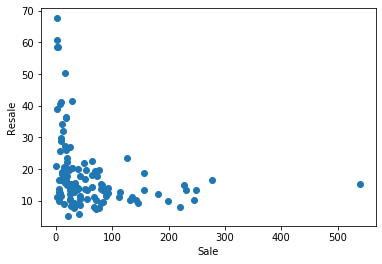

In [13]:
plt.scatter(df1["Sales_in_thousands"], df1["__year_resale_value"])
plt.xlabel("Sale")
plt.ylabel("Resale")
plt.show()

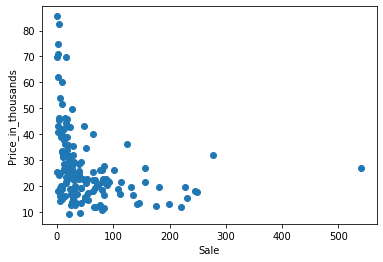

In [14]:
plt.scatter(df1["Sales_in_thousands"], df1["Price_in_thousands"])
plt.xlabel("Sale")
plt.ylabel("Price_in_thousands")
plt.show()

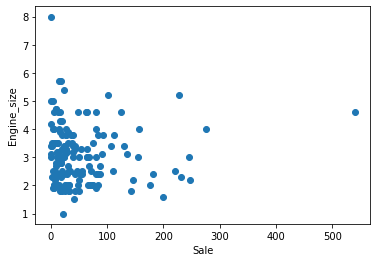

In [15]:
plt.scatter(df1["Sales_in_thousands"], df1["Engine_size"])
plt.xlabel("Sale")
plt.ylabel("Engine_size")
plt.show()

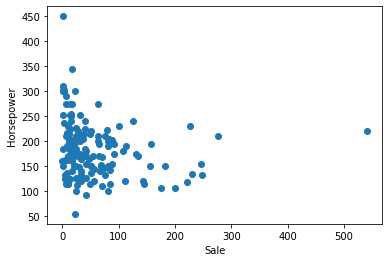

In [16]:
plt.scatter(df1["Sales_in_thousands"], df1["Horsepower"])
plt.xlabel("Sale")
plt.ylabel("Horsepower")
plt.show()

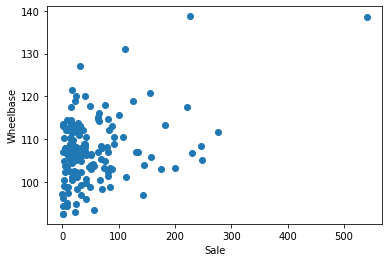

In [17]:
plt.scatter(df1["Sales_in_thousands"], df1["Wheelbase"])
plt.xlabel("Sale")
plt.ylabel("Wheelbase")
plt.show()

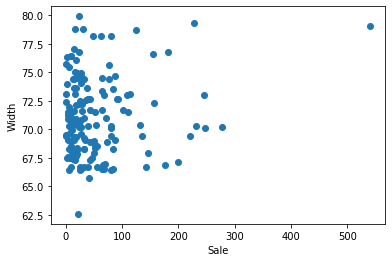

In [18]:
plt.scatter(df1["Sales_in_thousands"], df1["Width"])
plt.xlabel("Sale")
plt.ylabel("Width")
plt.show()

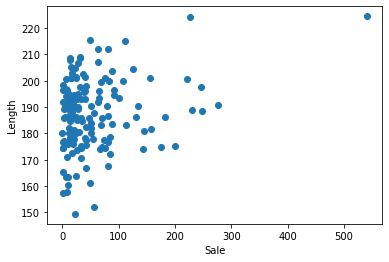

In [19]:
plt.scatter(df1["Sales_in_thousands"], df1["Length"])
plt.xlabel("Sale")
plt.ylabel("Length")
plt.show()

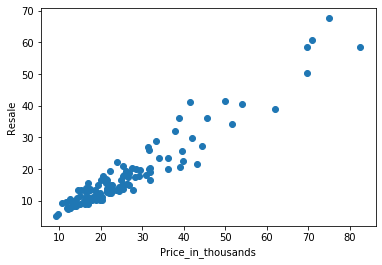

In [20]:
plt.scatter(df1["Price_in_thousands"], df1["__year_resale_value"])
plt.xlabel("Price_in_thousands")
plt.ylabel("Resale")
plt.show()

In [21]:
# Outlier and Missing Value Treatment

In [22]:
df1.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000


In [23]:
Outliers=df1.describe(percentiles=[.01,.05,.1,.2,.25,.5,.75,.90,.95,.99]).T

In [24]:
Outliers.to_csv("Outlier.csv")

In [25]:
df1.shape

(157, 12)

In [26]:
df1.isnull().sum()

Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
dtype: int64

In [27]:
df2=df1.drop(["__year_resale_value"], axis=1)

In [28]:
df2.columns

Index(['Sales_in_thousands', 'Vehicle_type', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency'],
      dtype='object')

In [29]:
# Outlier Capping
df2[df2['Sales_in_thousands'] >= 223.071631426884] = 223.071631426884
df2[df2['Price_in_thousands'] >= 63.2698878118058] = 63.2698878118058
df2[df2['Engine_size'] >= 5.67252986908698] = 5.67252986908698
df2[df2['Horsepower'] >= 327.699520094651] = 327.699520094651
df2[df2['Wheelbase'] >= 126.590437061704] = 126.590437061704
df2[df2['Width'] >= 79.7796796561483] = 79.7796796561483
df2[df2['Length'] >= 220.922975454881] = 220.922975454881
df2[df2['Curb_weight'] >= 4.95427989252485] = 4.95427989252485
df2[df2['Fuel_capacity'] >= 27.6717262390846] = 27.6717262390846
df2[df2['Fuel_efficiency'] >= 34.5509197488687] = 34.5509197488687
#df2[df2['Power_perf_factor'] >= 139.90025144826] = 139.90025144826


In [30]:
Outliers=df2.describe(percentiles=[.01,.05,.1,.2,.25,.5,.75,.90,.95,.99]).T
Outliers.to_csv("Out.csv")

In [31]:
df1.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000


In [32]:
df2.isnull().sum()

Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Curb_weight           2
Fuel_capacity         1
Fuel_efficiency       3
dtype: int64

In [33]:
# help(df2.fillna)

In [34]:
d3=df2.fillna(0)

In [35]:
d3.isnull().sum()

Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
dtype: int64

In [36]:
df2.isnull().sum()

Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Curb_weight           2
Fuel_capacity         1
Fuel_efficiency       3
dtype: int64

In [37]:
df2.shape

(157, 11)

In [38]:
df3=df2.dropna()

In [39]:
df3.shape

(152, 11)

In [40]:
df3.isnull().sum()

Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
dtype: int64

In [41]:
corr_data=df3.corr()

In [42]:
# corr_data.to_csv("Corr.csv")

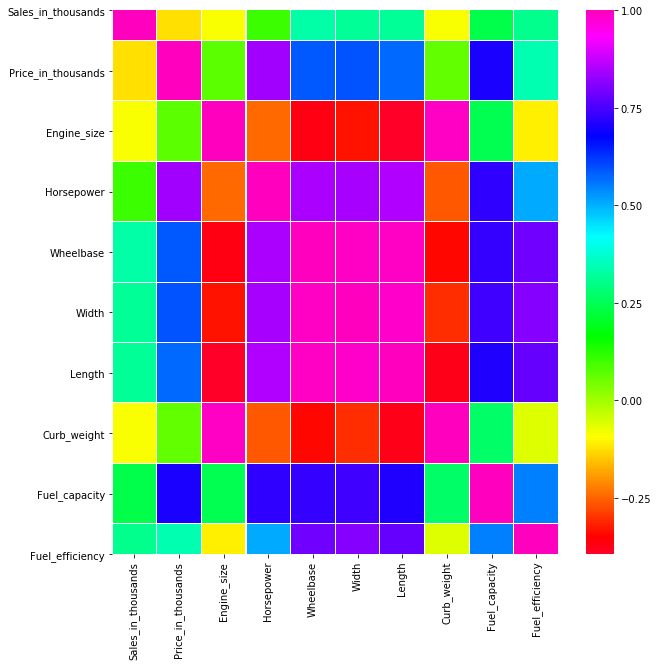

In [43]:
import seaborn as sns
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr_data, ax=ax,cmap="gist_rainbow", linewidths=0.1)
plt.show()

In [44]:
pd.set_option("precision",3)
corr_data.style.background_gradient(cmap="coolwarm")

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
Sales_in_thousands,1,-0.125,-0.0845,0.104,0.331,0.319,0.319,-0.0874,0.241,0.306
Price_in_thousands,-0.125,1,0.0693,0.84,0.588,0.593,0.575,0.0664,0.703,0.343
Engine_size,-0.0845,0.0693,1,-0.243,-0.368,-0.33,-0.394,0.99,0.246,-0.109
Horsepower,0.104,0.84,-0.243,1,0.85,0.845,0.857,-0.259,0.727,0.51
Wheelbase,0.331,0.588,-0.368,0.85,1,0.992,0.993,-0.344,0.733,0.79
Width,0.319,0.593,-0.33,0.845,0.992,1,0.988,-0.306,0.739,0.815
Length,0.319,0.575,-0.394,0.857,0.993,0.988,1,-0.375,0.708,0.779
Curb_weight,-0.0874,0.0664,0.99,-0.259,-0.344,-0.306,-0.375,1,0.269,-0.0566
Fuel_capacity,0.241,0.703,0.246,0.727,0.733,0.739,0.708,0.269,1,0.548
Fuel_efficiency,0.306,0.343,-0.109,0.51,0.79,0.815,0.779,-0.0566,0.548,1


In [45]:
df3.isnull().sum()

Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
dtype: int64

[]

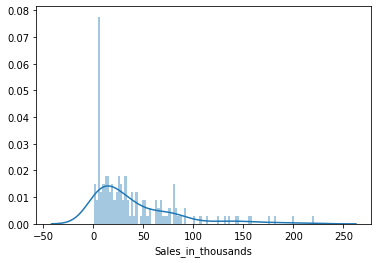

In [46]:
import seaborn as sns
#plt.hist(df3['Sales_in_thousands'], bins="auto")
sns.distplot(df3['Sales_in_thousands'], bins=100)
plt.plot()

In [47]:
df3['Sales_log']=np.log1p(df3['Sales_in_thousands'])
df3['sqrt_Sales_log']=np.sqrt(np.log1p(df3['Sales_in_thousands']))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[]

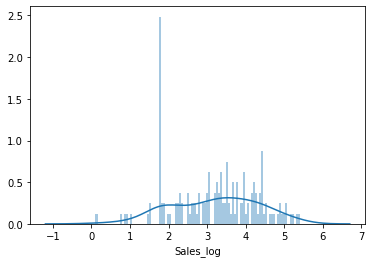

In [48]:
import seaborn as sns
#plt.hist(df3['Sales_in_thousands'], bins="auto")
sns.distplot(df3['Sales_log'], bins=100)
#plt.plot()
#plt.hist(df3['sqrt_Sales_log'], bins="auto")
plt.plot()

In [49]:
df3["Vehicle_type"].value_counts()

Passenger           101
Car                  30
4.95427989252485     19
27.6717262390846      1
34.5509197488687      1
Name: Vehicle_type, dtype: int64

In [50]:
df3["dummy_vehicle"]=np.where(df3["Vehicle_type"]=="Car",1,0)
# df3.drop( columns=["Vehicle_type"], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df3["dummy_vehicle"].value_counts()

0    122
1     30
Name: dummy_vehicle, dtype: int64

In [52]:
import statsmodels.api as sm
X = df3[['Price_in_thousands',
         'Engine_size', 
#          'Horsepower', 
         'Wheelbase', 
#          'Width', 
#          'Length',
#          'Curb_weight',
#          'Fuel_capacity',
         'Fuel_efficiency',
         "dummy_vehicle"
        ]]
Y = df3['Sales_log']
# Y=df3["Sales_in_thousands"]

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
#predictions = model.predict(X) 


print(model.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:              Sales_log   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     30.89
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           2.40e-21
Time:                        18:16:15   Log-Likelihood:                -177.05
No. Observations:                 152   AIC:                             366.1
Df Residuals:                     146   BIC:                             384.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.3623      0

In [53]:
df3["Pred_Sale"]=np.exp(model.predict(X))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
df3.to_excel("Df3Predicted.xlsx")

In [55]:
np.log1p(100)

4.61512051684126

In [56]:
np.exp(4.61512051684126) 

101.00000000000003

In [57]:
X = df3[['Price_in_thousands',
         'Engine_size', 
         'Horsepower', 
         'Wheelbase', 
         'Width', 
         'Length',
         'Curb_weight',
         'Fuel_capacity',
         'Fuel_efficiency',
         "dummy_vehicle"
        ]]
Y = df3['Sales_log']


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [59]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = .3, random_state = 42)

In [91]:
linearRegressor = LinearRegression() 

In [92]:
linearRegressor.fit(xTrain, yTrain)  # We are training our model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
linearRegressor.coef_

array([-0.07048606,  0.30494313,  0.00561776,  0.06704264, -0.04393271,
       -0.01231077, -0.20767244, -0.02090779,  0.04521811,  0.57567776])

In [94]:
X.columns

Index(['Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'dummy_vehicle'],
      dtype='object')

In [68]:
linearRegressor.intercept_

1.4143709366577162

In [69]:
linearRegressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [70]:
yPrediction = linearRegressor.predict(xTrain)

In [71]:
yPrediction

array([3.73566354, 1.74884365, 3.77483322, 2.41080745, 1.74884365,
       3.38892054, 3.85786594, 2.84842667, 4.09872665, 4.01728668,
       3.74696824, 3.38204807, 3.48427224, 2.00903898, 3.62970256,
       4.57157398, 4.00453132, 4.26332714, 2.73286469, 4.03151693,
       3.80539165, 3.3696053 , 1.74884365, 3.13608748, 3.3531833 ,
       3.76134101, 3.21531702, 3.86394183, 2.47215272, 3.4799912 ,
       1.74528383, 3.78955358, 2.64328177, 4.12499412, 3.50457775,
       4.11727994, 1.59503305, 3.81070287, 3.85280772, 4.11692426,
       1.74884365, 3.1317278 , 3.54641172, 3.64180633, 4.33095831,
       3.09003045, 3.53726235, 1.74884365, 3.51125485, 4.32757528,
       3.78019514, 4.24475059, 3.88548195, 2.04298468, 2.67244755,
       3.23807321, 2.96407861, 3.45547803, 3.0614179 , 3.93190829,
       1.74884365, 2.88816845, 1.74884365, 3.4197222 , 3.28196778,
       3.62670847, 2.64589975, 3.60664009, 1.74884365, 3.75411934,
       3.37722007, 1.79662042, 4.11978061, 1.74884365, 3.36922

In [72]:
y_pred_anti=np.exp(yPrediction)
y_act_anti=np.exp(yTrain)

In [73]:
pred = pd.DataFrame({'Actual Sale': y_act_anti, 'Predicted sales': y_pred_anti})
df_pred=pred.head(25)

In [74]:
pred.to_excel("Pred_train1.xlsx")

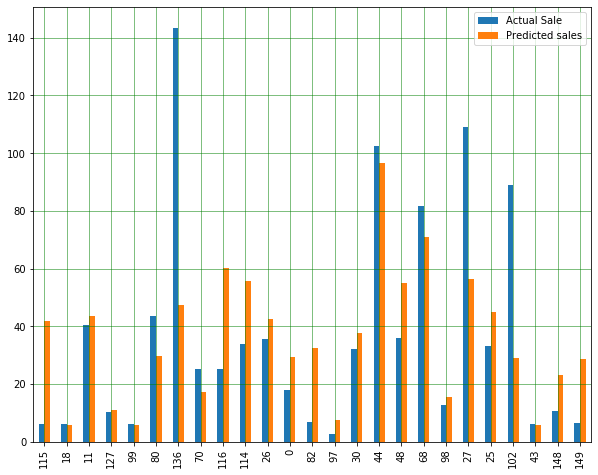

In [75]:
df_pred.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [76]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_act_anti, y_pred_anti))  
print('Mean Squared Error:', metrics.mean_squared_error(y_act_anti, y_pred_anti))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_act_anti, y_pred_anti)))

Mean Absolute Error: 21.424947866001975
Mean Squared Error: 1277.4184119272002
Root Mean Squared Error: 35.74099063998087


In [77]:
SS_Residual = sum((yTrain-yPrediction)**2)
SS_Total = sum((yTrain-np.mean(yTrain))**2)
#r_squared = 1 - (float(SS_Residual))/SS_Total
r_squared=(SS_Total-SS_Residual)/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(yTrain)-1)/(len(yTrain)-xTrain.shape[1]-1)
print (r_squared, adjusted_r_squared)

0.5510730739126765 0.5038176080087476


In [78]:
 print(linearRegressor.coef_)

[-0.07048606  0.30494313  0.00561776  0.06704264 -0.04393271 -0.01231077
 -0.20767244 -0.02090779  0.04521811  0.57567776]


In [79]:
 print(linearRegressor.intercept_)

1.4143709366577162


In [80]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(yTrain, yPrediction)
r2 = r2_score(yTrain, yPrediction)

In [81]:
rmse

0.5719826815716939

In [82]:
r2

0.5510730739126765

In [83]:
#pd.DataFrame(zip(X.columns,linearRegressor.coef_), columns=["Features", "Coef"])

In [84]:
for idx, col_name in enumerate(xTrain.columns):
    print("The coefficient for {} is {}".format(col_name, linearRegressor.coef_[idx]))

The coefficient for Price_in_thousands is -0.07048605935265126
The coefficient for Engine_size is 0.3049431323959775
The coefficient for Horsepower is 0.005617762694235206
The coefficient for Wheelbase is 0.06704263788511826
The coefficient for Width is -0.04393270912174667
The coefficient for Length is -0.012310773091548667
The coefficient for Curb_weight is -0.2076724380055283
The coefficient for Fuel_capacity is -0.02090778837364297
The coefficient for Fuel_efficiency is 0.04521810784386487
The coefficient for dummy_vehicle is 0.5756777642720302


In [85]:
yPrediction = linearRegressor.predict(xTest)
pred = pd.DataFrame({'Actual Sale': yTest, 'Predicted sales': yPrediction})
df_pred=pred.head(25)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(yTest, yPrediction))  
print('Mean Squared Error:', metrics.mean_squared_error(yTest, yPrediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, yPrediction)))

Mean Absolute Error: 0.6298914221151583
Mean Squared Error: 0.6839145382927841
Root Mean Squared Error: 0.8269912564790417


In [86]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(yTest, yPrediction)
r2 = r2_score(yTest, yPrediction)

In [87]:
r2

0.4073915464003556

In [88]:
rmse

0.6839145382927841

In [89]:
print(linearRegressor.coef_)

[-0.07048606  0.30494313  0.00561776  0.06704264 -0.04393271 -0.01231077
 -0.20767244 -0.02090779  0.04521811  0.57567776]


In [90]:
 print(linearRegressor.intercept_)

1.4143709366577162


In [ ]:
# Variable selection :- corr , Var ( Cont - cont - T, z test, cont - cat- ANOVA, 
#  Cat -cat- Chisquare ), STEPWISE Regression,  VIF, 
# Advanced techniques - variables selection _rough set theory,  Vriables techniques.
# Advanced algorithsm - Random forest, Xgboost etc - Variable importance 

In [ ]:
linearRegressor.predict() 